# Topik
Classification

# Pengenalan 

Sebuah Multinational Company memiliki permasalahan dalam mengidentifikasikan orang yang tepat untuk promosi (hanya untuk posisi manajer ke bawah). Oleh karena itu, perusahaan ini membutuhkan bantuan dalam mengidentifikasi kandidat yang memenuhi syarat sehingga mereka dapat mempercepat seluruh siklus promosi.

Beberapa atribut telah disediakan meliputi :
•	employee_id: Unique ID for employee
•	department: Department of employee
•	region: Region of employment (unordered)
•	education: Education Level
•	gender: Gender of Employee
•	recruitment_channel: Channel of recruitment for employee
•	no_ of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc.
•	age: Age of Employee
•	previous_ year_ rating: Employee Rating for the previous year
•	length_ of_ service: Length of service in years
•	awards_ won?: if awards won during previous year then 1 else 0
•	avg_ training_ score: Average score in current training evaluations
•	is_promoted: (Target) Recommended for promotion

Tujuan dilakukannya analisis pada data ini adalah untuk memprediksi kandidat yang memenuhi syarat untuk promosi.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

### Load Data

In [2]:
train = pd.read_csv('train_df.csv')
test = pd.read_csv('test_df.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


### EDA

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [4]:
test.shape

(23490, 12)

C:\Users\BRIAGRO-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_promoted', ylabel='count'>

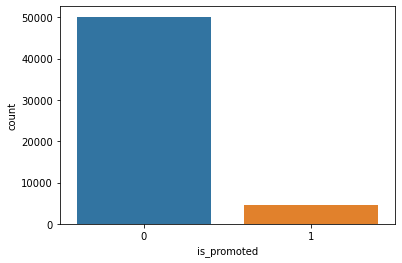

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style

sns.countplot(train.is_promoted)

In [6]:
del train['employee_id']
del test['employee_id']

In [7]:
cats = [c for c in train.columns if train[c].dtypes=='object']
nums = [c for c in train.columns if c not in cats]
print(cats)
print(nums)

['department', 'region', 'education', 'gender', 'recruitment_channel']
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted']


In [8]:
true_cats = ['department', 'region', 'education', 'gender', 'recruitment_channel','awards_won?', 
             'previous_year_rating','length_of_service', 'no_of_trainings']

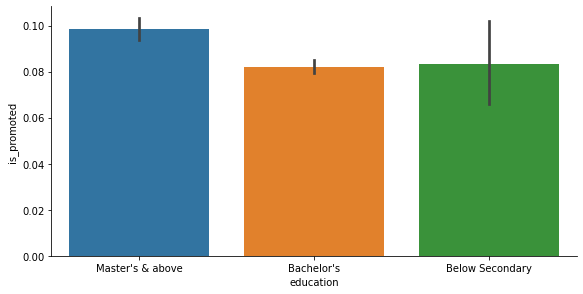

In [9]:
sns.catplot(x="education", y="is_promoted", kind="bar", data=train, height=4, aspect=2)


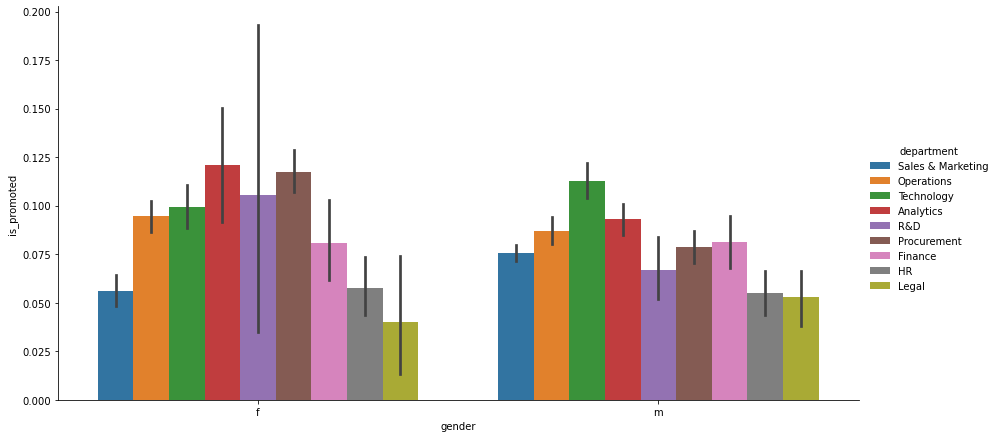

In [10]:

sns.catplot(x="gender", y="is_promoted", hue="department", kind="bar", data=train, height=6, aspect=2)


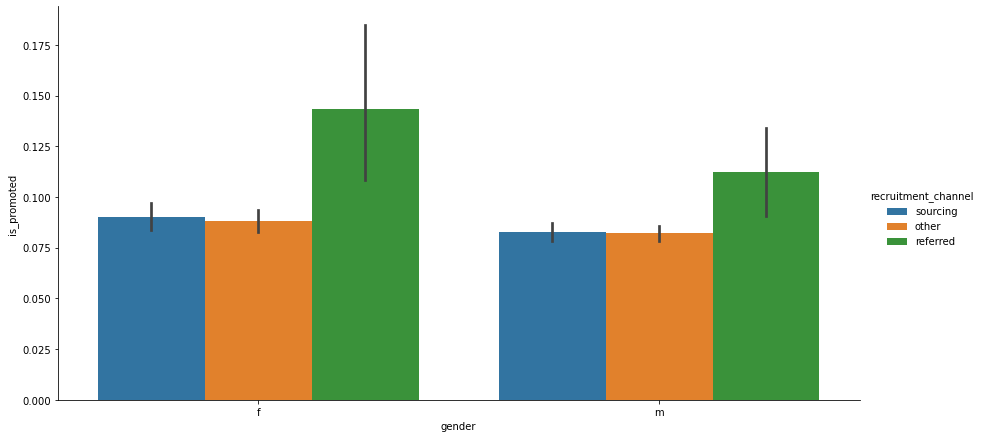

In [11]:
sns.catplot(x="gender", y="is_promoted", hue="recruitment_channel", kind="bar", data=train, height=6, aspect=2)

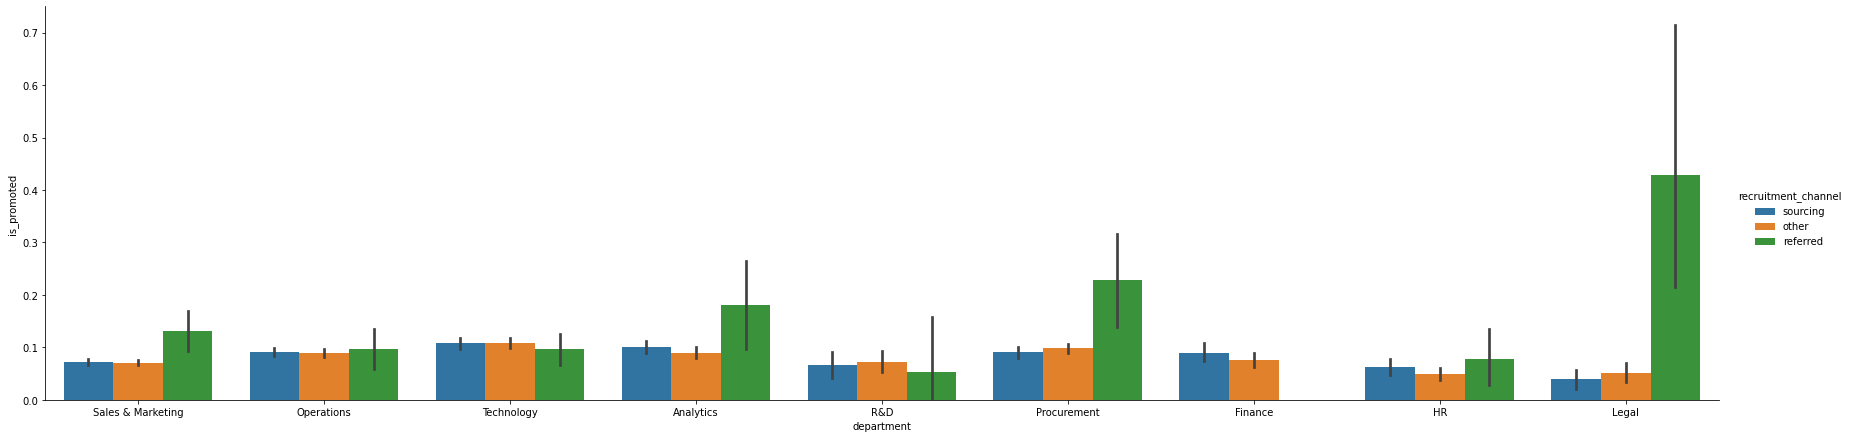

In [12]:
sns.catplot(x="department", y="is_promoted", hue="recruitment_channel", kind="bar", data=train, height=6, aspect=4)

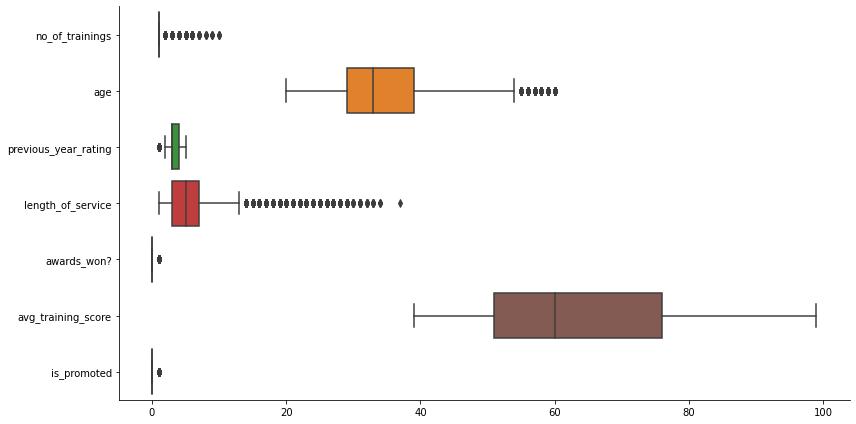

In [13]:
sns.catplot(data=train, orient="h", kind="box", height=6, aspect=2)

In [14]:
true_nums = [c for c in train.columns if c not in true_cats]
true_nums.remove('is_promoted')

C:\Users\BRIAGRO-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BRIAGRO-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BRIAGRO-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

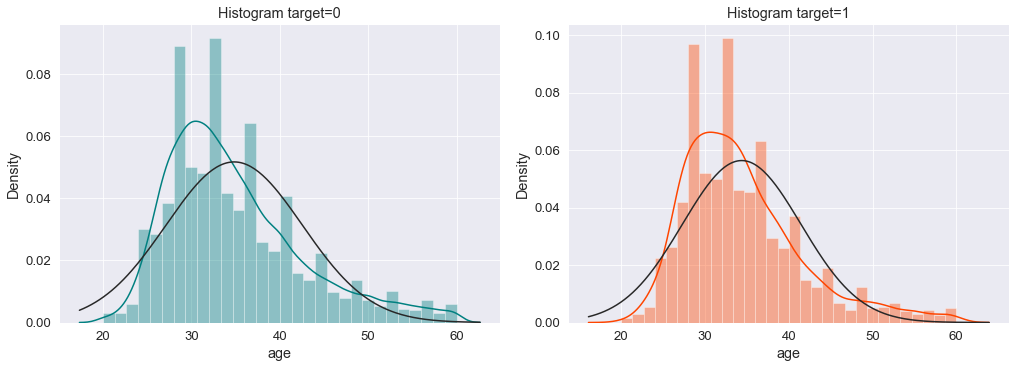

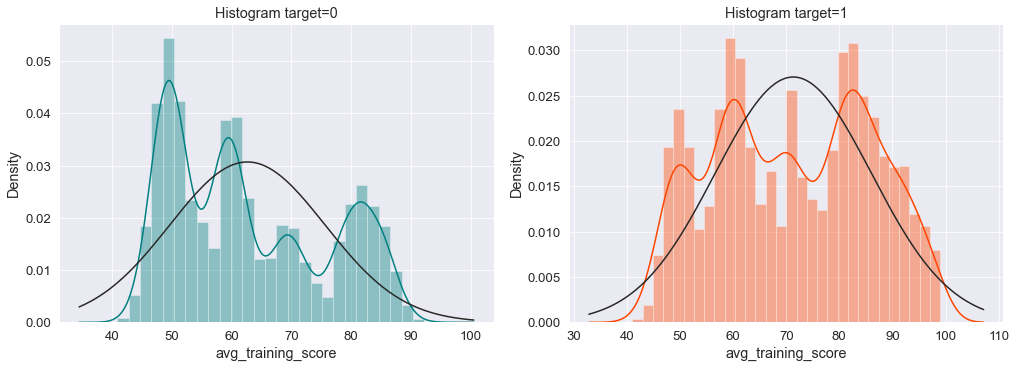

In [15]:
from scipy.stats import norm

sns.set()
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})
for c in true_nums:
    
    fig = plt.figure(constrained_layout=True, figsize=(14,5))
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title('Histogram target=0')
    sns.distplot(train[train.is_promoted==0].loc[:,c].dropna(),bins=30, fit=norm, norm_hist=True,color='teal' , ax = ax1)
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title('Histogram target=1')
    sns.distplot(train[train.is_promoted==1].loc[:,c].dropna(), bins=30, fit=norm, norm_hist=True,color='orangered' , ax = ax2)
    
    

In [16]:
missingtr = train.isnull().sum()
missingtr[missingtr>0]

education               2409
previous_year_rating    4124
dtype: int64

In [17]:
missingts = test.isnull().sum()
missingts[missingts>0]

education               1034
previous_year_rating    1812
dtype: int64

C:\Users\BRIAGRO-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BRIAGRO-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BRIAGRO-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in 

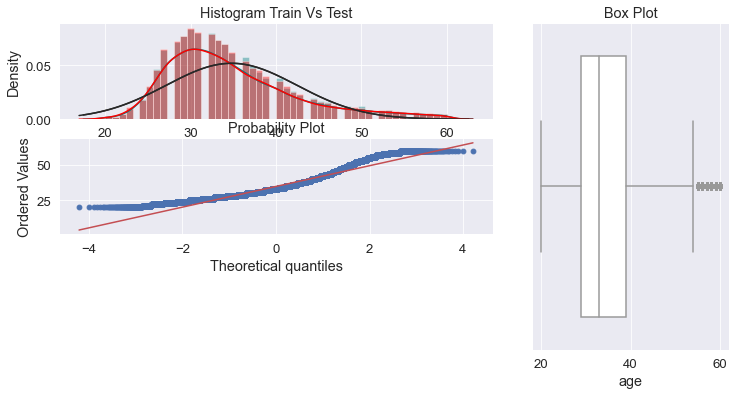

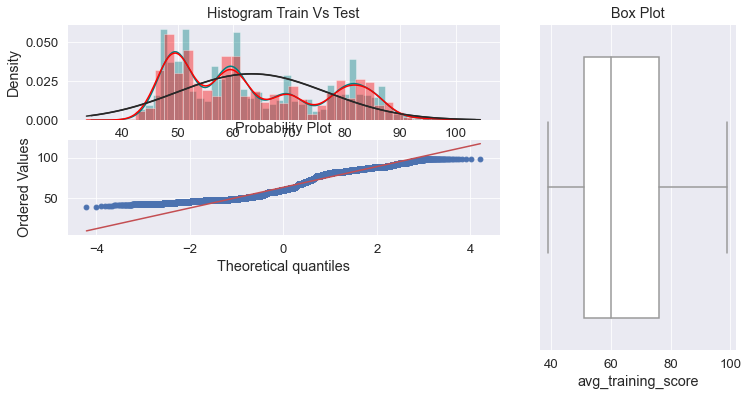

In [18]:
from scipy.stats import norm

sns.set()
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})
for c in true_nums:
    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,6))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram Train Vs Test')
    ## plot the histogram. 
    sns.distplot(train.loc[:,c].dropna(),fit=norm, norm_hist=True,color='teal' , ax = ax1)
    sns.distplot(test.loc[:,c].dropna(),  fit=norm, norm_hist=True,color='red' , ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(train.loc[:,c].dropna(), plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(train.loc[:,c].dropna(), orient='v', ax = ax3, color='white' );


#### Outliers

In [19]:
train = train[train.length_of_service<30]

<AxesSubplot:>

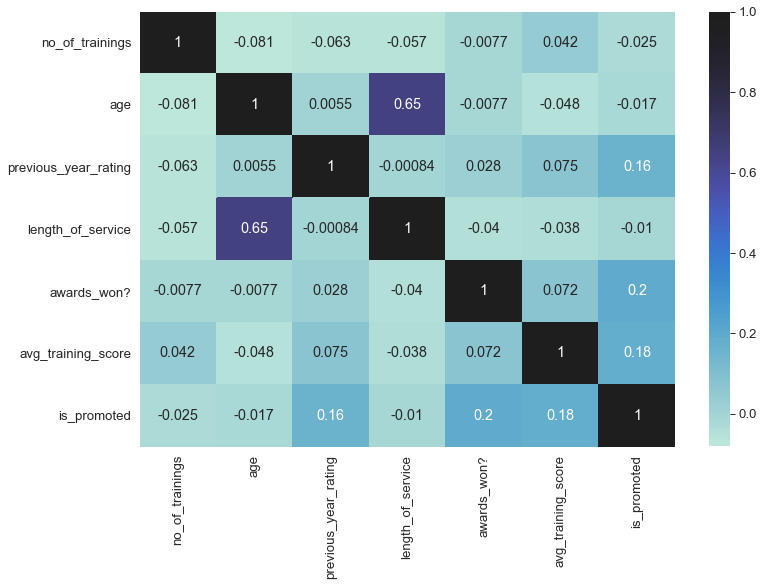

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(train, columns=train.columns).corr(), annot=True, center=True)

#### Imputation

In [21]:
from sklearn.impute import SimpleImputer
target = train.pop('is_promoted')

data = pd.concat([train, test], axis=0)
si = SimpleImputer(strategy= 'most_frequent')
data['education'] = si.fit_transform(data.education.values.reshape(-1, 1))
si = SimpleImputer(strategy='mean')
data['previous_year_rating'] = si.fit_transform(data.previous_year_rating.values.reshape(-1, 1))
data.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

#### label encoder

In [22]:
from sklearn.preprocessing import LabelEncoder
datal = data.copy()
for c in cats:
    le = LabelEncoder()
    datal[c] = le.fit_transform(datal[c])
    
train_le = datal.iloc[:len(train)]
test_le = datal.iloc[len(train):]
train_le.shape, test_le.shape

((54752, 11), (23490, 11))

In [23]:
data_oh = pd.get_dummies(data)
train_oh = data_oh.iloc[:len(train)]
test_oh = data_oh.iloc[len(train):]
train_oh.shape, test_oh.shape

((54752, 57), (23490, 57))

<AxesSubplot:>

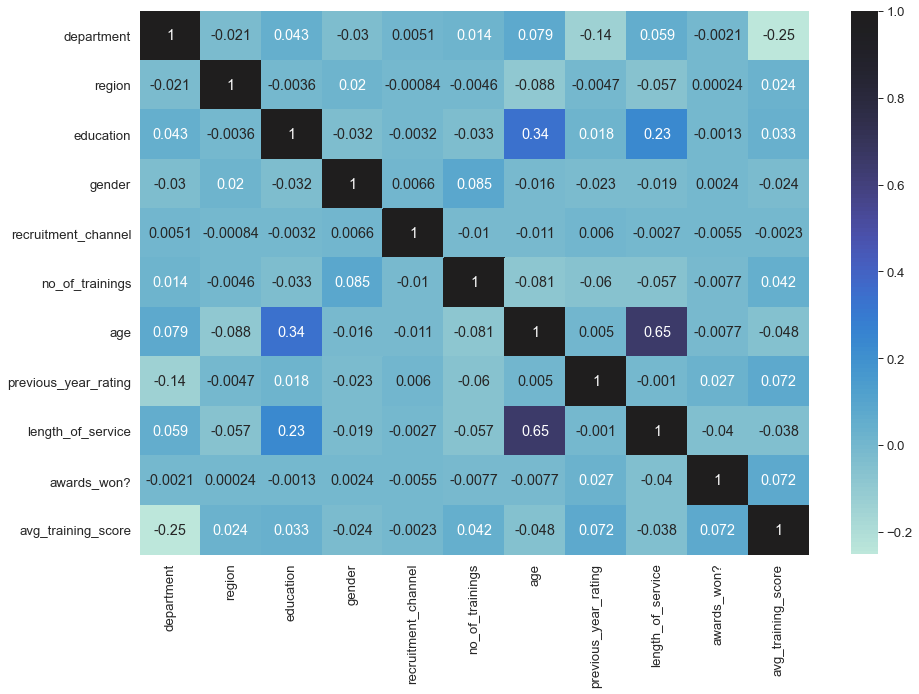

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.heatmap(train_le.corr(), annot=True, center=True)

In [25]:
from sklearn.preprocessing import StandardScaler, RobustScaler
ss = StandardScaler()
train_le = ss.fit_transform(train_le)
test_le = ss.fit_transform(test_le)

train_oh = ss.fit_transform(train_oh)
test_oh = ss.fit_transform(test_oh)

#THis Part of the logistic regression is not included  the REPORT. The F1-score is higher than the SVM results. 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
scores = []
oof = np.zeros(len(train))
y_le = target.values
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_, (train_ind, val_ind) in enumerate(folds.split(train_le, y_le)):
    print('fold:', fold_)
    X_tr, X_test = train_le[train_ind], train_le[val_ind]
    y_tr, y_test = y_le[train_ind], y_le[val_ind]
    clf = LogisticRegression(max_iter=200, random_state=2020)
    clf.fit(X_tr, y_tr)
    oof[val_ind]= clf.predict_proba(X_test)[:, 1]
    y = clf.predict_proba(X_tr)[:,1] 
    print('train:',roc_auc_score(y_tr, y),'val :' , roc_auc_score(y_test, (oof[val_ind])))
    print(20 * '-')
    
    scores.append(roc_auc_score(y_test, oof[val_ind]))
    
    
    
print('log reg  roc_auc=  ', np.mean(scores))
np.save('oof_rf', oof)

fold: 0
train: 0.743968035096586 val : 0.7328944555748207
--------------------
fold: 1
train: 0.74153644114492 val : 0.7433955428995225
--------------------
fold: 2
train: 0.7378488001035701 val : 0.7574984798083344
--------------------
fold: 3
train: 0.7419750665435167 val : 0.741576779282294
--------------------
fold: 4
train: 0.7443375151897897 val : 0.7323859727851719
--------------------
log reg  roc_auc=   0.7415502460700287


In [27]:
from sklearn.metrics import *
oof_rnd = np.where(oof > 0.5, 1, 0)

f1_score(target, oof_rnd)

0.1382381413359148

In [28]:
recall_score(target, oof_rnd)

0.07652733118971061

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
scores = []
oof = np.zeros(len(train_oh))
y_le = target.values
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_, (train_ind, val_ind) in enumerate(folds.split(train_oh, y_le)):
    print('fold:', fold_)
    X_tr, X_test = train_oh[train_ind], train_oh[val_ind]
    y_tr, y_test = y_le[train_ind], y_le[val_ind]
    clf = LogisticRegression(max_iter=200, random_state=2020)
    clf.fit(X_tr, y_tr)
    oof[val_ind]= clf.predict_proba(X_test)[:, 1]
    y = clf.predict_proba(X_tr)[:,1] 
    print('train:',roc_auc_score(y_tr, y),'val :' , roc_auc_score(y_test, (oof[val_ind])))
    print(20 * '-')
    
    scores.append(roc_auc_score(y_test, oof[val_ind]))
    
    
    
print('log reg  roc_auc=  ', np.mean(scores))
np.save('oof_rf', oof)


fold: 0
train: 0.7931202718718571 val : 0.7819824102253672
--------------------
fold: 1
train: 0.7897501709069539 val : 0.79278434937156
--------------------
fold: 2
train: 0.7868061847019592 val : 0.804318671120831
--------------------
fold: 3
train: 0.7930340720726938 val : 0.7815370354855481
--------------------
fold: 4
train: 0.7943494182608088 val : 0.7806564317616108
--------------------
log reg  roc_auc=   0.7882557795929834


In [30]:
oof_rnd = np.where(oof > 0.5, 1, 0)
f1_score(target, oof_rnd)

0.44655426420036015

In [31]:
recall_score(target, oof_rnd)

0.292390139335477

In [32]:
class_names=np.array(['0','1'])

# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
y = target
x = train_le


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.9222392182826876
test accuracy: 0.920463884576751


In [34]:
from sklearn.metrics import classification_report
prediction_SVM_all = svm.predict(x_test)
print(classification_report(y_test, prediction_SVM_all, target_names=class_names))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10018
           1       0.76      0.10      0.17       933

    accuracy                           0.92     10951
   macro avg       0.84      0.55      0.57     10951
weighted avg       0.91      0.92      0.89     10951



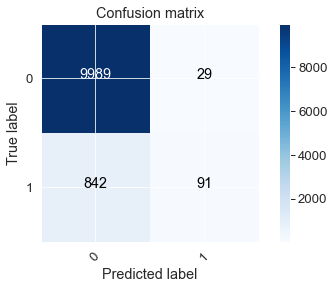

In [35]:
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [36]:
y = target
x = train_oh


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.9274445788908929
test accuracy: 0.9259428362706602


In [37]:
prediction_SVM_all = svm.predict(x_test)
print(classification_report(y_test, prediction_SVM_all, target_names=class_names))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10018
           1       0.94      0.14      0.24       933

    accuracy                           0.93     10951
   macro avg       0.93      0.57      0.60     10951
weighted avg       0.93      0.93      0.90     10951



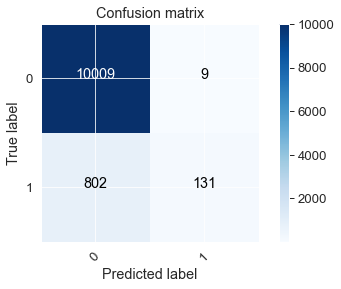

In [38]:

prediction_SVM_all = svm.predict(x_test)
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(x_train,y_train)
print("%.4f" % rf.oob_score_)

0.9363


In [40]:
rf.feature_importances_

array([0.01866873, 0.09359806, 0.06683462, 0.07963646, 0.05533501,
       0.37198618, 0.01272509, 0.00883028, 0.00502512, 0.00287552,
       0.02238449, 0.01192071, 0.00631345, 0.03576055, 0.01045728,
       0.00321796, 0.00337128, 0.00421965, 0.00198057, 0.0063421 ,
       0.00401212, 0.00678311, 0.00455891, 0.00534734, 0.00039968,
       0.0032001 , 0.00909086, 0.00320976, 0.00159357, 0.00809123,
       0.00574909, 0.00245799, 0.00439074, 0.00542918, 0.00562402,
       0.00506418, 0.00307425, 0.00295923, 0.00381292, 0.00461708,
       0.00230372, 0.00150422, 0.00076312, 0.00672266, 0.00198518,
       0.00219001, 0.00794413, 0.00376508, 0.00099406, 0.00655726,
       0.00148369, 0.00633237, 0.00958638, 0.00955411, 0.0109644 ,
       0.00531482, 0.01108634])

In [41]:
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:5]

,variable,importance
5,age,0.371986
1,education,0.093598
3,recruitment_channel,0.079636
2,gender,0.066835
4,no_of_trainings,0.055335


# Kesimpulan
Variable umur berpengaruh paling besar terhadap promosi dengan pengaruh sebesar 0,37 sehingga dapat disimpulkan bahwa variable umur memiliki pengaruh paling kuat terhadap sistem promosi.